In [1]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu(n_list=[400,800,2000,4000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha175,1), (p_alpha175,2), (p_alpha175,400)],
              show_progress=True,
              dz=1,n_indp='N',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3,fun1=None,fun2=None):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                dataI = np.hstack((generate_samples(n=n,dz=dz,indp='C',z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                    fun1=fun1, fun2=fun1)))
                dataII = np.hstack((generate_samples(n=n,dz=dz,indp=n_indp,z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                     fun1=fun1, fun2=fun1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], list(range(2,dz+2)))
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], list(range(2,dz+2)))
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

2025-02-05 23:24:47.733079: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 23:24:47.749640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738769087.769856     428 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738769087.775816     428 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 23:24:47.795483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Default (k=1)


n=2000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=2000:   2%|█▉                                                                                             | 1/50 [07:58<6:30:35, 478.27s/it]

n=2000:   4%|███▊                                                                                           | 2/50 [16:56<6:50:59, 513.74s/it]

n=2000:   6%|█████▋                                                                                         | 3/50 [25:38<6:45:24, 517.54s/it]

n=2000:   8%|███████▌                                                                                       | 4/50 [35:01<6:50:21, 535.26s/it]

n=2000:  10%|█████████▌                                                                                     | 5/50 [43:23<6:32:24, 523.21s/it]

n=2000:  12%|███████████▍                                                                                   | 6/50 [52:32<6:30:12, 532.11s/it]

n=2000:  14%|█████████████                                                                                | 7/50 [1:01:27<6:22:06, 533.18s/it]

n=2000:  16%|██████████████▉                                                                              | 8/50 [1:10:57<6:21:22, 544.82s/it]

n=2000:  18%|████████████████▋                                                                            | 9/50 [1:19:51<6:09:58, 541.43s/it]

n=2000:  20%|██████████████████▍                                                                         | 10/50 [1:29:11<6:04:46, 547.15s/it]

n=2000:  22%|████████████████████▏                                                                       | 11/50 [1:38:31<5:58:08, 551.00s/it]

n=2000:  24%|██████████████████████                                                                      | 12/50 [1:46:32<5:35:36, 529.90s/it]

n=2000:  26%|███████████████████████▉                                                                    | 13/50 [1:55:23<5:26:57, 530.20s/it]

n=2000:  28%|█████████████████████████▊                                                                  | 14/50 [2:04:02<5:16:05, 526.81s/it]

n=2000:  30%|███████████████████████████▌                                                                | 15/50 [2:12:20<5:02:12, 518.06s/it]

n=2000:  32%|█████████████████████████████▍                                                              | 16/50 [2:21:22<4:57:34, 525.13s/it]

n=2000:  34%|███████████████████████████████▎                                                            | 17/50 [2:31:05<4:58:26, 542.63s/it]

n=2000:  36%|█████████████████████████████████                                                           | 18/50 [2:40:39<4:54:26, 552.08s/it]

n=2000:  38%|██████████████████████████████████▉                                                         | 19/50 [2:48:50<4:35:40, 533.57s/it]

n=2000:  40%|████████████████████████████████████▊                                                       | 20/50 [2:57:25<4:24:06, 528.21s/it]

n=2000:  42%|██████████████████████████████████████▋                                                     | 21/50 [3:07:03<4:22:33, 543.21s/it]

n=2000:  44%|████████████████████████████████████████▍                                                   | 22/50 [3:16:14<4:14:28, 545.30s/it]

n=2000:  46%|██████████████████████████████████████████▎                                                 | 23/50 [3:25:17<4:05:10, 544.82s/it]

n=2000:  48%|████████████████████████████████████████████▏                                               | 24/50 [3:33:51<3:51:59, 535.38s/it]

n=2000:  50%|██████████████████████████████████████████████                                              | 25/50 [3:42:48<3:43:21, 536.06s/it]

n=2000:  52%|███████████████████████████████████████████████▊                                            | 26/50 [3:52:36<3:40:35, 551.50s/it]

n=2000:  54%|█████████████████████████████████████████████████▋                                          | 27/50 [4:01:29<3:29:18, 546.02s/it]

n=2000:  56%|███████████████████████████████████████████████████▌                                        | 28/50 [4:10:37<3:20:26, 546.65s/it]

n=2000:  58%|█████████████████████████████████████████████████████▎                                      | 29/50 [4:19:19<3:08:44, 539.25s/it]

n=2000:  60%|███████████████████████████████████████████████████████▏                                    | 30/50 [4:28:08<2:58:39, 535.98s/it]

n=2000:  62%|█████████████████████████████████████████████████████████                                   | 31/50 [4:36:47<2:48:08, 530.98s/it]

n=2000:  64%|██████████████████████████████████████████████████████████▉                                 | 32/50 [4:45:12<2:36:55, 523.10s/it]

n=2000:  66%|████████████████████████████████████████████████████████████▋                               | 33/50 [4:54:26<2:30:51, 532.44s/it]

n=2000:  68%|██████████████████████████████████████████████████████████████▌                             | 34/50 [5:02:40<2:18:55, 520.99s/it]

n=2000:  70%|████████████████████████████████████████████████████████████████▍                           | 35/50 [5:11:31<2:11:00, 524.05s/it]

n=2000:  72%|██████████████████████████████████████████████████████████████████▏                         | 36/50 [5:21:00<2:05:25, 537.56s/it]

n=2000:  74%|████████████████████████████████████████████████████████████████████                        | 37/50 [5:30:31<1:58:38, 547.57s/it]

n=2000:  76%|█████████████████████████████████████████████████████████████████████▉                      | 38/50 [5:39:52<1:50:17, 551.45s/it]

n=2000:  78%|███████████████████████████████████████████████████████████████████████▊                    | 39/50 [5:48:41<1:39:51, 544.71s/it]

n=2000:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 40/50 [5:57:38<1:30:25, 542.53s/it]

n=2000:  82%|███████████████████████████████████████████████████████████████████████████▍                | 41/50 [6:06:57<1:22:07, 547.49s/it]

n=2000:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 42/50 [6:16:10<1:13:11, 548.98s/it]

n=2000:  86%|███████████████████████████████████████████████████████████████████████████████             | 43/50 [6:25:23<1:04:12, 550.37s/it]

n=2000:  88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [6:34:12<54:22, 543.76s/it]

n=2000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [6:42:44<44:32, 534.40s/it]

n=2000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [6:52:08<36:13, 543.32s/it]

n=2000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [7:00:55<26:55, 538.41s/it]

n=2000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [7:10:06<18:03, 541.95s/it]

n=2000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [7:19:16<09:04, 544.44s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [7:27:47<00:00, 534.39s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [7:27:47<00:00, 537.34s/it]

n=4000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=4000:   2%|█▊                                                                                           | 1/50 [27:16<22:16:46, 1636.87s/it]

n=4000:   4%|███▋                                                                                         | 2/50 [52:55<21:03:03, 1578.83s/it]

n=4000:   6%|█████▍                                                                                     | 3/50 [1:19:42<20:46:59, 1591.91s/it]

n=4000:   8%|███████▎                                                                                   | 4/50 [1:45:42<20:10:40, 1579.13s/it]

n=4000:  10%|█████████                                                                                  | 5/50 [2:11:22<19:33:48, 1565.08s/it]

n=4000:  12%|██████████▉                                                                                | 6/50 [2:36:52<18:59:02, 1553.24s/it]

n=4000:  14%|████████████▋                                                                              | 7/50 [3:03:55<18:49:36, 1576.19s/it]

n=4000:  16%|██████████████▌                                                                            | 8/50 [3:31:52<18:45:46, 1608.24s/it]

n=4000:  18%|████████████████▍                                                                          | 9/50 [3:59:30<18:29:31, 1623.68s/it]

n=4000:  20%|██████████████████                                                                        | 10/50 [4:26:26<18:00:48, 1621.21s/it]

n=4000:  22%|███████████████████▊                                                                      | 11/50 [4:52:59<17:28:19, 1612.81s/it]

n=4000:  24%|█████████████████████▌                                                                    | 12/50 [5:20:52<17:12:53, 1630.88s/it]

n=4000:  26%|███████████████████████▍                                                                  | 13/50 [5:42:11<15:40:01, 1524.37s/it]

n=4000:  28%|█████████████████████████▏                                                                | 14/50 [6:01:36<14:09:33, 1415.92s/it]

n=4000:  30%|███████████████████████████                                                               | 15/50 [6:21:04<13:02:16, 1341.05s/it]

n=4000:  32%|████████████████████████████▊                                                             | 16/50 [6:41:15<12:17:48, 1302.00s/it]

n=4000:  34%|██████████████████████████████▌                                                           | 17/50 [7:02:28<11:51:15, 1293.20s/it]

n=4000:  36%|████████████████████████████████▍                                                         | 18/50 [7:22:05<11:11:06, 1258.33s/it]

n=4000:  38%|██████████████████████████████████▏                                                       | 19/50 [7:41:56<10:39:41, 1238.10s/it]

n=4000:  40%|████████████████████████████████████                                                      | 20/50 [8:01:25<10:08:44, 1217.50s/it]

n=4000:  42%|██████████████████████████████████████▏                                                    | 21/50 [8:21:24<9:45:42, 1211.80s/it]

n=4000:  44%|████████████████████████████████████████                                                   | 22/50 [8:41:19<9:23:10, 1206.79s/it]

n=4000:  46%|█████████████████████████████████████████▊                                                 | 23/50 [9:01:34<9:04:12, 1209.34s/it]

n=4000:  48%|███████████████████████████████████████████▋                                               | 24/50 [9:20:49<8:36:52, 1192.80s/it]

n=4000:  50%|█████████████████████████████████████████████▌                                             | 25/50 [9:40:41<8:17:00, 1192.81s/it]

n=4000:  52%|██████████████████████████████████████████████▊                                           | 26/50 [10:01:03<8:00:32, 1201.37s/it]

n=4000:  54%|████████████████████████████████████████████████▌                                         | 27/50 [10:20:39<7:37:39, 1193.88s/it]

n=4000:  56%|██████████████████████████████████████████████████▍                                       | 28/50 [10:40:23<7:16:36, 1190.77s/it]

n=4000:  58%|████████████████████████████████████████████████████▏                                     | 29/50 [11:00:00<6:55:20, 1186.67s/it]

n=4000:  60%|██████████████████████████████████████████████████████                                    | 30/50 [11:20:38<6:40:40, 1202.02s/it]

n=4000:  62%|███████████████████████████████████████████████████████▊                                  | 31/50 [11:41:19<6:24:22, 1213.82s/it]

n=4000:  64%|█████████████████████████████████████████████████████████▌                                | 32/50 [12:01:03<6:01:28, 1204.94s/it]

n=4000:  66%|███████████████████████████████████████████████████████████▍                              | 33/50 [12:21:07<5:41:17, 1204.55s/it]

n=4000:  68%|█████████████████████████████████████████████████████████████▏                            | 34/50 [12:40:48<5:19:18, 1197.43s/it]

n=4000:  70%|██████████████████████████████████████████████████████████████▉                           | 35/50 [13:01:12<5:01:20, 1205.37s/it]

n=4000:  72%|████████████████████████████████████████████████████████████████▊                         | 36/50 [13:21:29<4:42:04, 1208.88s/it]

n=4000:  74%|██████████████████████████████████████████████████████████████████▌                       | 37/50 [13:41:48<4:22:35, 1211.94s/it]

n=4000:  76%|████████████████████████████████████████████████████████████████████▍                     | 38/50 [14:01:18<3:59:53, 1199.48s/it]

n=4000:  78%|██████████████████████████████████████████████████████████████████████▏                   | 39/50 [14:20:49<3:38:20, 1190.92s/it]

n=4000:  80%|████████████████████████████████████████████████████████████████████████                  | 40/50 [14:40:44<3:18:40, 1192.04s/it]

n=4000:  82%|█████████████████████████████████████████████████████████████████████████▊                | 41/50 [15:01:32<3:01:21, 1209.06s/it]

n=4000:  84%|███████████████████████████████████████████████████████████████████████████▌              | 42/50 [15:21:29<2:40:41, 1205.22s/it]

n=4000:  86%|█████████████████████████████████████████████████████████████████████████████▍            | 43/50 [15:40:54<2:19:12, 1193.23s/it]

n=4000:  88%|███████████████████████████████████████████████████████████████████████████████▏          | 44/50 [16:00:02<1:57:57, 1179.59s/it]

n=4000:  90%|█████████████████████████████████████████████████████████████████████████████████         | 45/50 [16:20:42<1:39:48, 1197.74s/it]

n=4000:  92%|██████████████████████████████████████████████████████████████████████████████████▊       | 46/50 [16:41:35<1:20:58, 1214.52s/it]

n=4000:  94%|████████████████████████████████████████████████████████████████████████████████████▌     | 47/50 [17:01:51<1:00:44, 1214.83s/it]

n=4000:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 48/50 [17:22:03<40:27, 1213.85s/it]

n=4000:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 49/50 [17:41:29<19:59, 1199.68s/it]

n=4000: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [18:00:58<00:00, 1190.38s/it]

n=4000: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [18:00:58<00:00, 1297.17s/it]

Ensemble (k=1000, p_alpha125)


n=2000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=2000:   2%|█▉                                                                                             | 1/50 [04:44<3:52:17, 284.43s/it]

n=2000:   4%|███▊                                                                                           | 2/50 [09:17<3:42:03, 277.57s/it]

n=2000:   6%|█████▋                                                                                         | 3/50 [14:00<3:39:22, 280.05s/it]

n=2000:   8%|███████▌                                                                                       | 4/50 [18:48<3:37:13, 283.33s/it]

n=2000:  10%|█████████▌                                                                                     | 5/50 [23:28<3:31:40, 282.23s/it]

n=2000:  12%|███████████▍                                                                                   | 6/50 [28:08<3:26:21, 281.40s/it]

n=2000:  14%|█████████████▎                                                                                 | 7/50 [32:54<3:22:41, 282.82s/it]

n=2000:  16%|███████████████▏                                                                               | 8/50 [37:35<3:17:41, 282.43s/it]

n=2000:  18%|█████████████████                                                                              | 9/50 [42:20<3:13:32, 283.23s/it]

n=2000:  20%|██████████████████▊                                                                           | 10/50 [47:05<3:09:09, 283.75s/it]

n=2000:  22%|████████████████████▋                                                                         | 11/50 [51:45<3:03:33, 282.39s/it]

n=2000:  24%|██████████████████████▌                                                                       | 12/50 [56:29<2:59:08, 282.85s/it]

n=2000:  26%|███████████████████████▉                                                                    | 13/50 [1:01:06<2:53:29, 281.34s/it]

n=2000:  28%|█████████████████████████▊                                                                  | 14/50 [1:05:50<2:49:08, 281.90s/it]

n=2000:  30%|███████████████████████████▌                                                                | 15/50 [1:10:27<2:43:42, 280.65s/it]

n=2000:  32%|█████████████████████████████▍                                                              | 16/50 [1:15:04<2:38:23, 279.53s/it]

n=2000:  34%|███████████████████████████████▎                                                            | 17/50 [1:19:23<2:30:22, 273.41s/it]

n=2000:  36%|█████████████████████████████████                                                           | 18/50 [1:24:11<2:28:07, 277.72s/it]

n=2000:  38%|██████████████████████████████████▉                                                         | 19/50 [1:28:56<2:24:38, 279.94s/it]

n=2000:  40%|████████████████████████████████████▊                                                       | 20/50 [1:33:08<2:15:46, 271.55s/it]

n=2000:  42%|██████████████████████████████████████▋                                                     | 21/50 [1:37:52<2:13:00, 275.19s/it]

n=2000:  44%|████████████████████████████████████████▍                                                   | 22/50 [1:42:40<2:10:13, 279.04s/it]

n=2000:  46%|██████████████████████████████████████████▎                                                 | 23/50 [1:46:58<2:02:44, 272.75s/it]

n=2000:  48%|████████████████████████████████████████████▏                                               | 24/50 [1:51:42<1:59:39, 276.13s/it]

n=2000:  50%|██████████████████████████████████████████████                                              | 25/50 [1:56:29<1:56:20, 279.23s/it]

n=2000:  52%|███████████████████████████████████████████████▊                                            | 26/50 [2:01:14<1:52:23, 280.97s/it]

n=2000:  54%|█████████████████████████████████████████████████▋                                          | 27/50 [2:05:42<1:46:18, 277.33s/it]

n=2000:  56%|███████████████████████████████████████████████████▌                                        | 28/50 [2:10:19<1:41:34, 277.01s/it]

n=2000:  58%|█████████████████████████████████████████████████████▎                                      | 29/50 [2:15:03<1:37:45, 279.31s/it]

n=2000:  60%|███████████████████████████████████████████████████████▏                                    | 30/50 [2:19:29<1:31:44, 275.23s/it]

n=2000:  62%|█████████████████████████████████████████████████████████                                   | 31/50 [2:23:53<1:26:02, 271.73s/it]

n=2000:  64%|██████████████████████████████████████████████████████████▉                                 | 32/50 [2:28:18<1:20:57, 269.85s/it]

n=2000:  66%|████████████████████████████████████████████████████████████▋                               | 33/50 [2:33:01<1:17:31, 273.62s/it]

n=2000:  68%|██████████████████████████████████████████████████████████████▌                             | 34/50 [2:37:18<1:11:38, 268.63s/it]

n=2000:  70%|████████████████████████████████████████████████████████████████▍                           | 35/50 [2:41:44<1:07:01, 268.12s/it]

n=2000:  72%|██████████████████████████████████████████████████████████████████▏                         | 36/50 [2:46:22<1:03:12, 270.89s/it]

n=2000:  74%|█████████████████████████████████████████████████████████████████████▌                        | 37/50 [2:51:10<59:49, 276.08s/it]

n=2000:  76%|███████████████████████████████████████████████████████████████████████▍                      | 38/50 [2:55:23<53:50, 269.24s/it]

n=2000:  78%|█████████████████████████████████████████████████████████████████████████▎                    | 39/50 [3:00:03<49:57, 272.51s/it]

n=2000:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 40/50 [3:04:40<45:36, 273.69s/it]

n=2000:  82%|█████████████████████████████████████████████████████████████████████████████                 | 41/50 [3:09:13<41:02, 273.58s/it]

n=2000:  84%|██████████████████████████████████████████████████████████████████████████████▉               | 42/50 [3:13:51<36:39, 274.92s/it]

n=2000:  86%|████████████████████████████████████████████████████████████████████████████████▊             | 43/50 [3:18:21<31:52, 273.23s/it]

n=2000:  88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [3:23:02<27:34, 275.83s/it]

n=2000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [3:27:46<23:10, 278.17s/it]

n=2000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [3:32:27<18:35, 278.86s/it]

n=2000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [3:37:02<13:53, 277.92s/it]

n=2000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [3:41:39<09:15, 277.55s/it]

n=2000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [3:46:19<04:38, 278.16s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [3:50:55<00:00, 277.70s/it]

n=2000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [3:50:55<00:00, 277.11s/it]

n=4000:   0%|                                                                                                          | 0/50 [00:00<?, ?it/s]

n=4000:   2%|█▉                                                                                             | 1/50 [09:24<7:40:39, 564.06s/it]

n=4000:   4%|███▊                                                                                           | 2/50 [18:47<7:31:06, 563.89s/it]

n=4000:   6%|█████▋                                                                                         | 3/50 [28:12<7:21:52, 564.10s/it]

n=4000:   8%|███████▌                                                                                       | 4/50 [37:23<7:08:42, 559.19s/it]

n=4000:  10%|█████████▌                                                                                     | 5/50 [46:28<6:55:24, 553.88s/it]

n=4000:  12%|███████████▍                                                                                   | 6/50 [55:04<6:36:40, 540.91s/it]

n=4000:  14%|█████████████                                                                                | 7/50 [1:04:02<6:27:10, 540.24s/it]

n=4000:  16%|██████████████▉                                                                              | 8/50 [1:13:32<6:24:38, 549.48s/it]

n=4000:  18%|████████████████▋                                                                            | 9/50 [1:22:59<6:19:12, 554.95s/it]

n=4000:  20%|██████████████████▍                                                                         | 10/50 [1:32:08<6:08:46, 553.17s/it]

n=4000:  22%|████████████████████▏                                                                       | 11/50 [1:41:28<6:00:56, 555.30s/it]

n=4000:  24%|██████████████████████                                                                      | 12/50 [1:50:36<5:50:12, 552.95s/it]

n=4000:  26%|███████████████████████▉                                                                    | 13/50 [2:00:09<5:44:45, 559.08s/it]

n=4000:  28%|█████████████████████████▊                                                                  | 14/50 [2:08:54<5:29:21, 548.93s/it]

n=4000:  30%|███████████████████████████▌                                                                | 15/50 [2:18:03<5:20:12, 548.93s/it]

n=4000:  32%|█████████████████████████████▍                                                              | 16/50 [2:27:24<5:13:10, 552.67s/it]

n=4000:  34%|███████████████████████████████▎                                                            | 17/50 [2:36:54<5:06:42, 557.64s/it]

n=4000:  36%|█████████████████████████████████                                                           | 18/50 [2:46:19<4:58:36, 559.89s/it]

n=4000:  38%|██████████████████████████████████▉                                                         | 19/50 [2:55:14<4:45:25, 552.42s/it]

n=4000:  40%|████████████████████████████████████▊                                                       | 20/50 [3:04:45<4:39:02, 558.08s/it]

n=4000:  42%|██████████████████████████████████████▋                                                     | 21/50 [3:13:31<4:25:07, 548.53s/it]

n=4000:  44%|████████████████████████████████████████▍                                                   | 22/50 [3:23:09<4:20:01, 557.20s/it]

n=4000:  46%|██████████████████████████████████████████▎                                                 | 23/50 [3:32:33<4:11:42, 559.34s/it]

n=4000:  48%|████████████████████████████████████████████▏                                               | 24/50 [3:41:51<4:02:08, 558.80s/it]

n=4000:  50%|██████████████████████████████████████████████                                              | 25/50 [3:51:15<3:53:30, 560.41s/it]

n=4000:  52%|███████████████████████████████████████████████▊                                            | 26/50 [4:00:17<3:41:57, 554.89s/it]

n=4000:  54%|█████████████████████████████████████████████████▋                                          | 27/50 [4:08:52<3:28:07, 542.93s/it]

n=4000:  56%|███████████████████████████████████████████████████▌                                        | 28/50 [4:18:16<3:21:27, 549.44s/it]

n=4000:  58%|█████████████████████████████████████████████████████▎                                      | 29/50 [4:27:52<3:14:59, 557.14s/it]

n=4000:  60%|███████████████████████████████████████████████████████▏                                    | 30/50 [4:37:23<3:07:09, 561.49s/it]

n=4000:  62%|█████████████████████████████████████████████████████████                                   | 31/50 [4:46:56<2:58:51, 564.84s/it]

n=4000:  64%|██████████████████████████████████████████████████████████▉                                 | 32/50 [4:56:18<2:49:10, 563.93s/it]

n=4000:  66%|████████████████████████████████████████████████████████████▋                               | 33/50 [5:05:47<2:40:15, 565.61s/it]

n=4000:  68%|██████████████████████████████████████████████████████████████▌                             | 34/50 [5:15:12<2:30:44, 565.28s/it]

n=4000:  70%|████████████████████████████████████████████████████████████████▍                           | 35/50 [5:24:33<2:21:01, 564.12s/it]

n=4000:  72%|██████████████████████████████████████████████████████████████████▏                         | 36/50 [5:33:45<2:10:44, 560.35s/it]

n=4000:  74%|████████████████████████████████████████████████████████████████████                        | 37/50 [5:42:37<1:59:35, 551.98s/it]

n=4000:  76%|█████████████████████████████████████████████████████████████████████▉                      | 38/50 [5:52:00<1:51:03, 555.32s/it]

n=4000:  78%|███████████████████████████████████████████████████████████████████████▊                    | 39/50 [6:01:26<1:42:24, 558.59s/it]

n=4000:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 40/50 [6:10:56<1:33:38, 561.87s/it]

n=4000:  82%|███████████████████████████████████████████████████████████████████████████▍                | 41/50 [6:20:16<1:24:11, 561.32s/it]

n=4000:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 42/50 [6:28:49<1:12:53, 546.67s/it]

n=4000:  86%|███████████████████████████████████████████████████████████████████████████████             | 43/50 [6:38:13<1:04:24, 552.12s/it]

n=4000:  88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [6:47:07<54:39, 546.55s/it]

n=4000:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [6:56:34<46:03, 552.78s/it]

n=4000:  92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [7:06:06<37:14, 558.56s/it]

n=4000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [7:15:37<28:06, 562.10s/it]

n=4000:  96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [7:25:00<18:45, 562.54s/it]

n=4000:  98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [7:34:15<09:20, 560.20s/it]

n=4000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [7:43:42<00:00, 562.36s/it]

n=4000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [7:43:42<00:00, 556.46s/it]

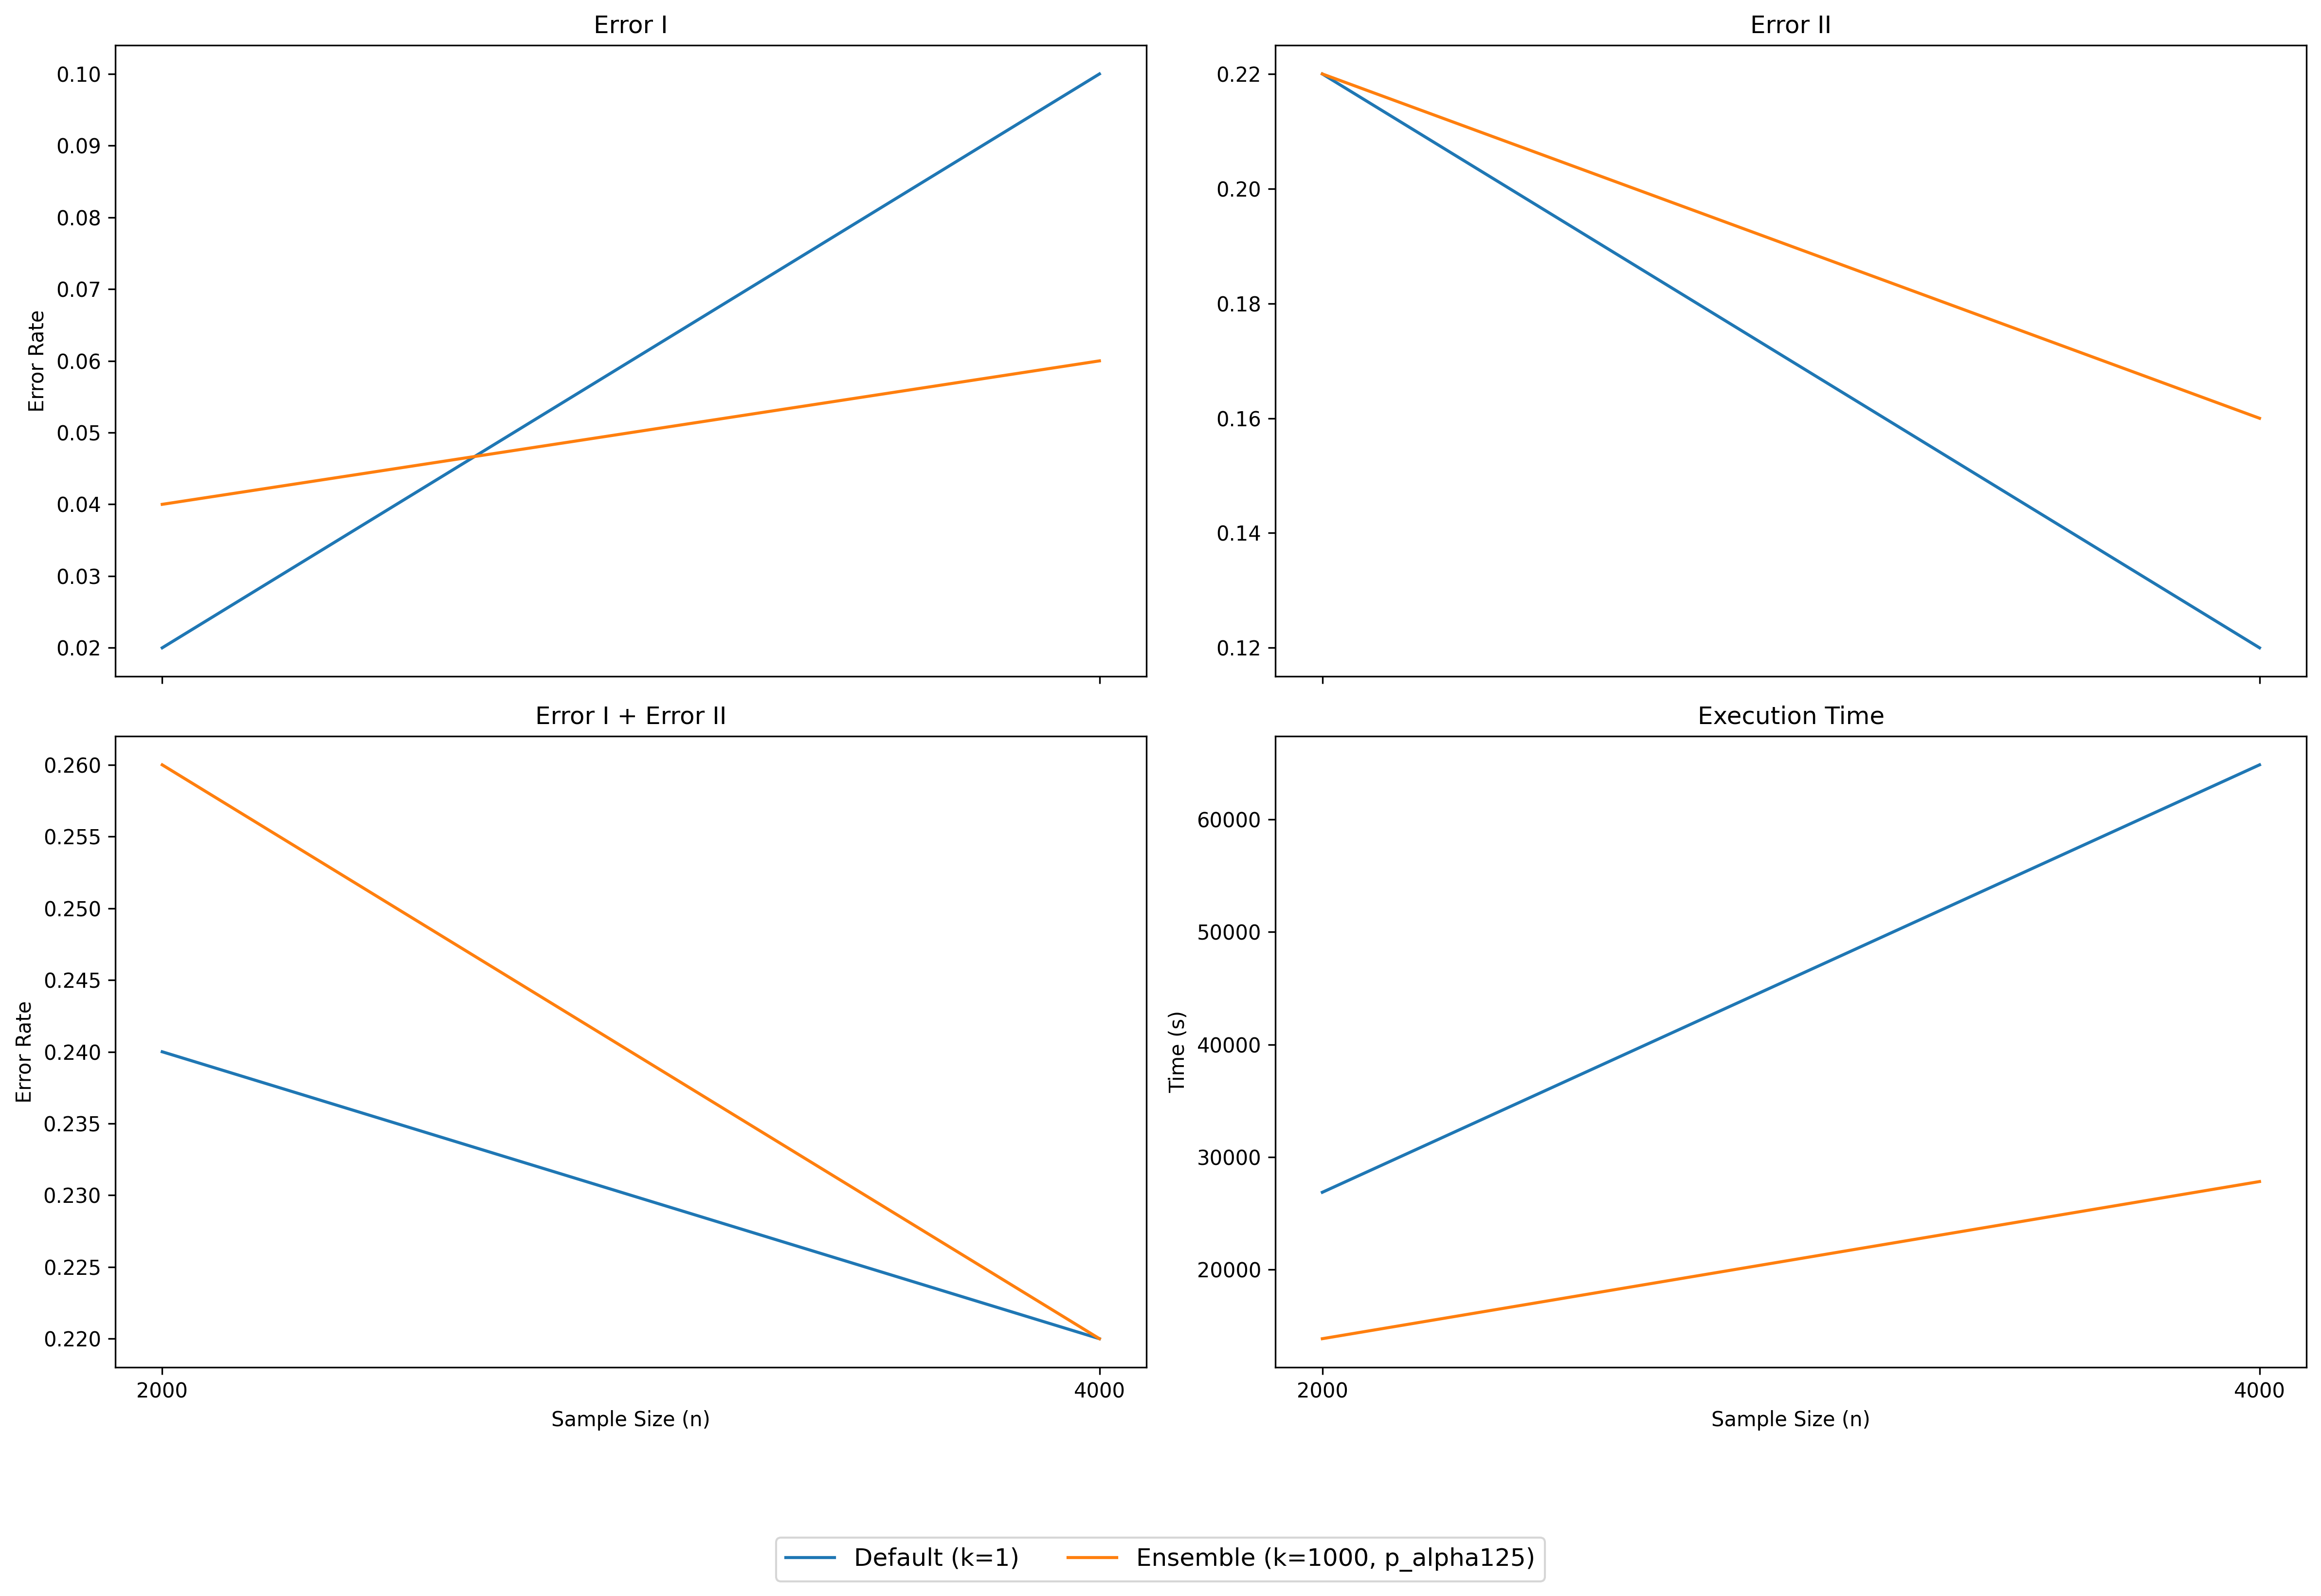

[[[0.02, 0.1], [0.22, 0.12], [26867.234130620956, 64858.4134554863]],
 [[0.04, 0.06], [0.22, 0.16], [13855.68843626976, 27822.848571777344]]]

In [2]:
n_list = [2000, 4000]
ensembles = [(p_alpha125, 1), (p_alpha125, 1000)]
t = 50
cit = cmiknn
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=10,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results